<a href="https://colab.research.google.com/github/juanserrano90/codelatam/blob/main/SNIDSNspectra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
from os.path import isfile

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix


In [ ]:

file_df_raw = "sn_data.parquet"
df_raw = pd.read_parquet(file_df_raw)

In [ ]:
df_raw

,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,2515.28,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
SN Name,,,,,,,,,,,,,,,,,,,,,
sn2008ar,Ia-norm,0,Ia,0,-8.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-7.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-6.60,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-4.60,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-3.70,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sn2007uy,Ib-pec,9,Ib,1,12.82,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2007uy,Ib-pec,9,Ib,1,45.82,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2007uy,Ib-pec,9,Ib,1,54.82,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


the data is stored in a somewhat bizzarro way, with the wavelength as the column name and the row as the SN

In [ ]:
wavelength = [float(c) for c in df_raw.columns[5:]]

In [ ]:
df_raw.loc[(df_raw.index == "sn2008ar") * (df_raw["Spectral Phase"] == -2.7)]

,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,2515.28,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
SN Name,,,,,,,,,,,,,,,,,,,,,
sn2008ar,Ia-norm,0,Ia,0,-2.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


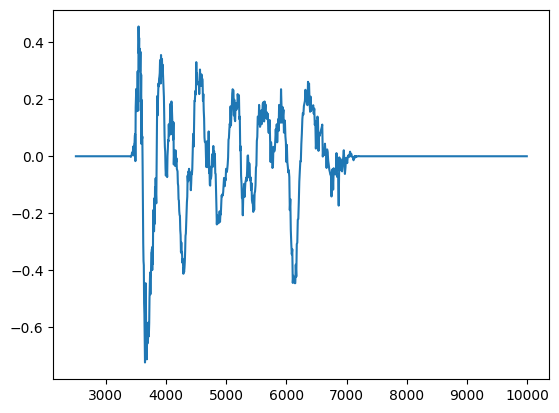

In [ ]:
plt.plot(wavelength, df_raw.loc[(df_raw.index == "sn2008ar") * (df_raw["Spectral Phase"] == -2.7)].iloc[:, 5:].values[0])

or you can use multiindex

In [ ]:
df_raw_multiindex = df_raw.set_index([df_raw.index, "SN Maintype", "SN Subtype", "Spectral Phase"])
df_raw_multiindex.drop(
    ["SN Subtype ID","SN Maintype ID"], axis=1, inplace=True)
df_raw_multiindex

2501.69  2505.08  2508.48  \
SN Name  SN Maintype SN Subtype Spectral Phase                              
sn2008ar Ia          Ia-norm    -8.50               0.0      0.0      0.0   
                                -7.50               0.0      0.0      0.0   
                                -6.60               0.0      0.0      0.0   
                                -4.60               0.0      0.0      0.0   
                                -3.70               0.0      0.0      0.0   
...                                                 ...      ...      ...   
sn2007uy Ib          Ib-pec      12.82              0.0      0.0      0.0   
                                 45.82              0.0      0.0      0.0   
                                 54.82              0.0      0.0      0.0   
                                 75.82              0.0      0.0      0.0   
                                 141.82             0.0      0.0      0.0   

                                                2511.87  2515.28  2518.69  \
SN Name  SN Maintype SN Subtype Spectral Phase                              
sn2008ar Ia          Ia-norm    -8.50               0.0      0.0      0.0   
                                -7.50               0.0      0.0      0.0   
                                -6.60               0.0      0.0      0.0   
                                -4.60               0.0      0.0      0.0   
                                -3.70               0.0      0.0      0.0   
...                                                 ...      ...      ...   
sn2007uy Ib          Ib-pec      12.82              0.0      0.0      0.0   
                                 45.82              0.0      0.0      0.0   
                                 54.82              0.0      0.0      0.0   
                                 75.82              0.0      0.0      0.0   
                                 141.82             0.0      0.0      0.0   

                                                2522.10  2525.51  2528.94  \
SN Name  SN Maintype SN Subtype Spectral Phase                              
sn2008ar Ia          Ia-norm    -8.50               0.0      0.0      0.0   
                                -7.50               0.0      0.0      0.0   
                                -6.60               0.0      0.0      0.0   
                                -4.60               0.0      0.0      0.0   
                                -3.70               0.0      0.0      0.0   
...                                                 ...      ...      ...   
sn2007uy Ib          Ib-pec      12.82              0.0      0.0      0.0   
                                 45.82              0.0      0.0      0.0   
                                 54.82              0.0      0.0      0.0   
                                 75.82              0.0      0.0      0.0   
                                 141.82             0.0      0.0      0.0   

                                                2532.36  ...  9872.21  \
SN Name  SN Maintype SN Subtype Spectral Phase           ...            
sn2008ar Ia          Ia-norm    -8.50               0.0  ...      0.0   
                                -7.50               0.0  ...      0.0   
                                -6.60               0.0  ...      0.0   
                                -4.60               0.0  ...      0.0   
                                -3.70               0.0  ...      0.0   
...                                                 ...  ...      ...   
sn2007uy Ib          Ib-pec      12.82              0.0  ...      0.0   
                                 45.82              0.0  ...      0.0   
                                 54.82              0.0  ...      0.0   
                                 75.82              0.0  ...      0.0   
                                 141.82             0.0  ...      0.0   

                                                9885.59  9898.98  9912.39  \
SN Name  SN Mai

or transpose and use multicolumn

In [ ]:
df_raw_multiindex.T

SN Name        sn2008ar                                                  \
SN Maintype          Ia                                                   
SN Subtype      Ia-norm                                                   
Spectral Phase  -8.50   -7.50   -6.60   -4.60   -3.70   -2.70   -1.70     
2501.69             0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2505.08             0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2508.48             0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2511.87             0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2515.28             0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...                 ...     ...     ...     ...     ...     ...     ...   
9939.27             0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9952.73             0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9966.21             0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9979.71             0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9993.24             0.0     0.0     0.0     0.0     0.0     0.0     0.0   

SN Name                                 ... sn2007uy                          \
SN Maintype                             ...       Ib                           
SN Subtype                              ...   Ib-pec                           
Spectral Phase -0.70    1.20    3.10    ...  -13.18  -11.18  -6.18   -5.18     
2501.69            0.0     0.0     0.0  ...      0.0     0.0     0.0     0.0   
2505.08            0.0     0.0     0.0  ...      0.0     0.0     0.0     0.0   
2508.48            0.0     0.0     0.0  ...      0.0     0.0     0.0     0.0   
2511.87            0.0     0.0     0.0  ...      0.0     0.0     0.0     0.0   
2515.28            0.0     0.0     0.0  ...      0.0     0.0     0.0     0.0   
...                ...     ...     ...  ...      ...     ...     ...     ...   
9939.27            0.0     0.0     0.0  ...      0.0     0.0     0.0     0.0   
9952.73            0.0     0.0     0.0  ...      0.0     0.0     0.0     0.0   
9966.21            0.0     0.0     0.0  ...      0.0     0.0     0.0     0.0   
9979.71            0.0     0.0     0.0  ...      0.0     0.0     0.0     0.0   
9993.24            0.0     0.0     0.0  ...      0.0     0.0     0.0     0.0   

SN Name                                                         
SN Maintype                                                     
SN Subtype                                                      
Spectral Phase -3.18    12.82   45.82   54.82   75.82   141.82  
2501.69            0.0     0.0     0.0     0.0     0.0     0.0  
2505.08            0.0     0.0     0.0     0.0     0.0     0.0  
2508.48            0.0     0.0     0.0     0.0     0.0     0.0  
2511.87            0.0     0.0     0.0     0.0     0.0     0.0  
2515.28            0.0     0.0     0.0     0.0     0.0     0.0  
...                ...     ...     ...     ...     ...     ...  
9939.27            0.0     0.0     0.0     0.0     0.0     0.0  
9952.73            0.0     0.0     0.0     0.0     0.0     0.0  
9966.21            0.0     0.0     0.0     0.0     0.0     0.0  
9979.71            0.0     0.0     0.0     0.0     0.0     0.0  
9993.24            0.0     0.0     0.0     0.0     0.0     0.0  

[1024 rows x 5001 columns]

#explore data:

unique SN subtypes

uniqye SN main type

unique SN

typical series length (in time)

wavelength span

is there padding? invalid data, spurious entries?